In [1]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
t=[[5],[7],[10],[12],[15],[20]]
m=[40,80,120,200,240,250]
LR.fit(t,m)
LR.predict([[6]])

array([71.6722408])

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data=pd.read_csv("/content/drive/MyDrive/demand_june.csv")

In [4]:
data.head(5)


,REGION,date,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,01-06-2023 00:05,7953.04,90.2,TRADE
1,NSW1,01-06-2023 00:10,7967.67,90.2,TRADE
2,NSW1,01-06-2023 00:15,7923.89,90.2,TRADE
3,NSW1,01-06-2023 00:20,7907.81,90.2,TRADE
4,NSW1,01-06-2023 00:25,7855.31,90.2,TRADE


In [5]:
data.tail(5)

,REGION,date,TOTALDEMAND,RRP,PERIODTYPE
7771,NSW1,27-06-2023 23:40,8536.43,116.99,TRADE
7772,NSW1,27-06-2023 23:45,8527.02,89.00,TRADE
7773,NSW1,27-06-2023 23:50,8489.29,88.88,TRADE
7774,NSW1,27-06-2023 23:55,8358.07,61.74,TRADE
7775,NSW1,28-06-2023 00:00,8394.93,64.77,TRADE


In [6]:
data.shape

(7776, 5)

In [7]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [8]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/demand_june.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
df_student_perform = pd.read_csv("/content/drive/MyDrive/demand_june.csv")
df_student_perform.head(5)

,REGION,date,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,01-06-2023 00:05,7953.04,90.2,TRADE
1,NSW1,01-06-2023 00:10,7967.67,90.2,TRADE
2,NSW1,01-06-2023 00:15,7923.89,90.2,TRADE
3,NSW1,01-06-2023 00:20,7907.81,90.2,TRADE
4,NSW1,01-06-2023 00:25,7855.31,90.2,TRADE


In [10]:
print(df_student_perform.describe())
print(df_student_perform.info())

        TOTALDEMAND           RRP
count   7776.000000   7776.000000
mean    8382.620156    106.006049
std     1384.479890    248.338411
min     5642.400000    -50.010000
25%     7304.410000     64.990000
50%     8207.640000     89.000000
75%     9336.162500    117.940000
max    12589.220000  14800.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REGION       7776 non-null   object 
 1   date         7776 non-null   object 
 2   TOTALDEMAND  7776 non-null   float64
 3   RRP          7776 non-null   float64
 4   PERIODTYPE   7776 non-null   object 
dtypes: float64(2), object(3)
memory usage: 303.9+ KB
None


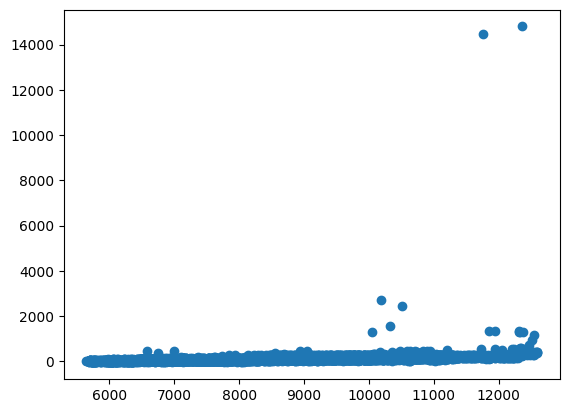

In [12]:
prev_score_values = df_student_perform["TOTALDEMAND"].values
performance = df_student_perform["RRP"].values
plt.scatter(prev_score_values, performance)
plt.show()

In [14]:
prev_scores_vector = prev_score_values.reshape(-1,1)
prev_scores_vector[:2]

array([[7953.04],
       [7967.67]])

In [15]:
model = LinearRegression().fit(prev_scores_vector, performance)
model

LinearRegression()

In [16]:
prediction = model.predict(prev_scores_vector)
prediction

array([ 89.27211103,  89.84201053,  88.13659697, ..., 110.16128462,
       105.04971845, 106.48556915])

In [ ]:
plt.scatter(prev_score_values, performance)
plt.plot(prev_score_values, prediction, color="orange")
plt.show()

In [ ]:
previous_score = 88
test_score_predict = model.predict([[previous_score]])[0]
print(f'Since you scored {previous_score} on your last test, you should have a performance index of {int(test_score_predict)}')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(prev_scores_vector, performance, train_size=.8, test_size=.2)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")

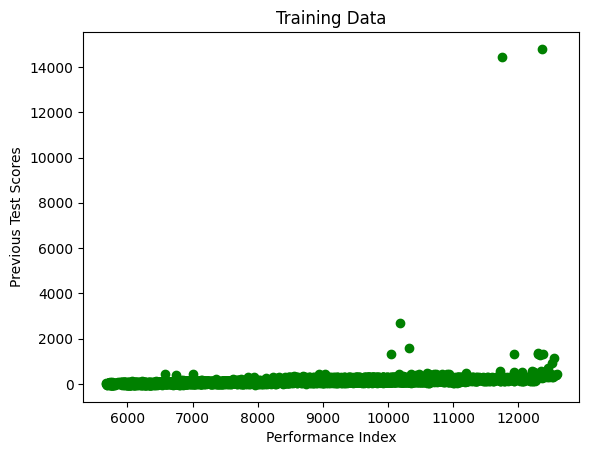

In [21]:
plt.scatter(x_train, y_train, color='green')
plt.xlabel('Performance Index')
plt.ylabel('Previous Test Scores')
plt.title('Training Data')
plt.show()

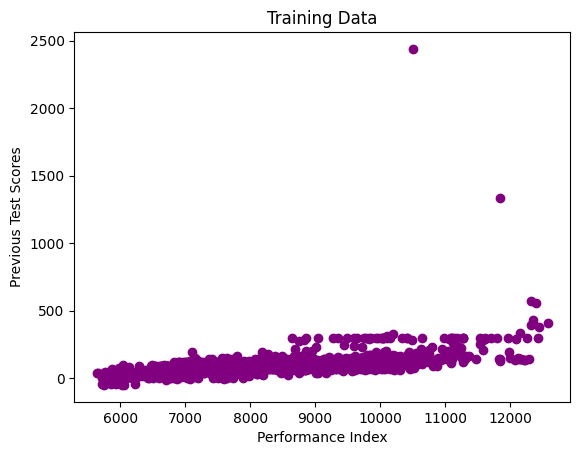

In [22]:
plt.scatter(x_test, y_test, color='purple')
plt.xlabel('Performance Index')
plt.ylabel('Previous Test Scores')
plt.title('Training Data')
plt.show()

In [23]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_predict = linear_model.predict(x_test)

print(f'Train accuracy is: {round(linear_model.score(x_train, y_train)*100,2)}%')
print(f'Test accuracy is: {round(linear_model.score(x_test, y_test)*100,2)}%')

Train accuracy is: 4.23%
Test accuracy is: 22.16%
